In [16]:
### import numpy as np
import gensim
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.visualize_util import plot,model_to_dot
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
import pickle
import pandas as pd
import numpy as np

In [17]:
corpora = gensim.corpora.Dictionary.load('./data/corpora.dat')
vocab_size = len(corpora)
print('Number of words in corpora: %d'%(vocab_size))
tmp = list(corpora.items())

Number of words in corpora: 26


In [18]:
#the_filename = './data/wonderland.txt.dat'
the_filename = './data/test.txt.dat'
with open(the_filename, 'rb') as f:
    text = pickle.load(f)

In [19]:
len(text)

30

### Generate words patterns

In [20]:
seq_length = 2

In [21]:
dataX = []
dataY = []

for i in range(0, len(text)-seq_length, 1):
    seq_in = text[i:i+seq_length]
    seq_out = text[i+seq_length]
    dataX.append(seq_in)
    dataY.append(seq_out)

In [22]:
seq_length

2

In [23]:
len(dataX)

28

In [24]:
len(dataY)

28

In [25]:
dataX, dataY

([[2, 0],
  [0, 4],
  [4, 8],
  [8, 3],
  [3, 6],
  [6, 5],
  [5, 9],
  [9, 7],
  [7, 1],
  [1, 10],
  [10, 12],
  [12, 13],
  [13, 11],
  [11, 15],
  [15, 17],
  [17, 16],
  [16, 19],
  [19, 18],
  [18, 14],
  [14, 10],
  [10, 22],
  [22, 21],
  [21, 23],
  [23, 20],
  [20, 25],
  [25, 21],
  [21, 23],
  [23, 24]],
 [4,
  8,
  3,
  6,
  5,
  9,
  7,
  1,
  10,
  12,
  13,
  11,
  15,
  17,
  16,
  19,
  18,
  14,
  10,
  22,
  21,
  23,
  20,
  25,
  21,
  23,
  24,
  20])

In [26]:
lstm_1 = LSTM(50, input_shape=(seq_length,1))
#lstm_1 = LSTM(50, input_length=seq_lenght)

In [27]:
out_layer = Dense(output_dim=vocab_size, activation='softmax')

In [28]:
model = Sequential(layers=[lstm_1, out_layer])

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 50)            10400       lstm_input_1[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 26)            1326        lstm_1[0][0]                     
Total params: 11726
____________________________________________________________________________________________________


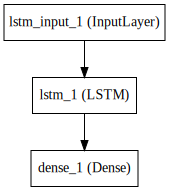

In [31]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [32]:
X = np.reshape(dataX, (len(dataX), seq_length, 1))

NameError: name 'np' is not defined

In [ ]:
X.shape

In [ ]:
y = np_utils.to_categorical(dataY)
y.shape

In [ ]:
filepath="test.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')

model.fit(X, y, batch_size=1, nb_epoch=500, callbacks=[checkpoint])

In [ ]:
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

### Test prediction

In [ ]:
def get_next(inp):
    idxs = [corpora.token2id[c] for c in inp]
    idxs = np.reshape(idxs, (1, seq_length, 1))
    #idxs = idxs / float(len(corpora))
    prediction = model.predict(idxs, verbose=0)
    index = np.argmax(prediction)
    result = corpora.id2token[index]
    return result

In [ ]:
get_next(['One', 'two'])

In [ ]:
test_cases_text = pd.read_csv('./data/test_cases_text.csv')
pred = []
for index, row in test_cases_text.iterrows():
    #print( '%s %s'%(row['in_0'], row['in_1']))
    inp = [row['in_0'], row['in_1']]
    #print(inp)
    tmp = get_next(inp)
    pred.append(tmp)
test_cases_text['predicted'] = pred

In [ ]:
test_cases_text[test_cases_text.out!=test_cases_text.predicted]

In [ ]:
true_cnt = len(test_cases_text[test_cases_text.out==test_cases_text.predicted].index) * 1.0
all_cnt = len(test_cases_text.index) * 1.0
print('True cnt: %d All cnt %d'%(true_cnt, all_cnt))
print("Precision: %.2f"%( true_cnt/all_cnt))